# COMP5318 - Machine Learning and Data Mining: Assignment 1
<div style="text-align: right"> Due: Friday Week 7 - Fri 8 April 2022 11:59PM </div>

# 1. Summary
The goal of this assignment is to build a classifier to classify some grayscale images of the size 28x28 into a set of categories. The dimension of the original data is large, so you need to be smart on which method you gonna use and perhaps perform a pre-processing step to reduce the amount of computation. Part of your marks will be a function of the performance of your classifier on the test set.

# 2. Dataset description
The dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. The features of the 5,000 test examples are given, you will analyse the performance of your proposed method by uploading the predicted labels of test examples onto [Kaggle Leaderboard](https://www.kaggle.com/t/a781604ffe46a42f903dd4be1b9daf16). You can find the instruction of using the leaderboard in Part 5.2. The leaderboard will compute the accuracy of your model, and team ranking will be shown based on the performance. Please note that we provide only PART of the original Fashion-MNIST, you must use the GIVEN `train.csv` (not the original dataset from the official website) for training; or it will be considered as cheating. <br />
Here are examples illustrating samples of the dataset (each class takes one row):

<img src="Dataset_image.jpg" alt="DataSet" title="DataSet" width="450" height="300" />

There are 10 classes in total:

    - 0 T-shirt/Top
    - 1 Trouser
    - 2 Pullover
    - 3 Dress
    - 4 Coat
    - 5 Sandal
    - 6 Shirt
    - 7 Sneaker
    - 8 Bag
    - 9 Ankle boot

# 3. Load the data and make output prediciton
An Input folder including only 2 files (which can be downloaded from Canvas):

    1. train.csv (30000 image samples for training including features and label) 
    2. test_input.csv (5000 images for prediction)

## 3.1 Load the dataset 

To read the *csv* file and load the data into a dataframe using pandas. 

The **training data files are in the ./Input/train** and **testing data file are in ./Input/test**. <br /> Use the following code:

In [1]:
import pandas as pd
import os
print(os.listdir("./Input/train"))
pd.set_option('display.max_columns', 10)

['train.csv']


In [2]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./Input/train/train.csv')

In [3]:
data_train_df.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,0,0,0,0,0,...,0,0,0,0,2
1,1,0,0,0,0,...,0,0,0,0,1
2,2,0,0,0,0,...,0,0,0,0,1
3,3,0,0,0,1,...,0,0,0,0,4
4,4,0,0,0,0,...,0,0,0,0,8


Then data would be a dataframe with 30000 samples including 784 features (from v1 to v784) and its label.

In [8]:
# Selecting input feature
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()

# Selecting output lable 
data_train_label = data_train_df.label.to_numpy()

Showing a sample data. The first example belongs to class 2: Pullover

[[  0   0   0   0   1   0   0 131 184 199 229 234 217 212 204 208 226 227
  203 185 173  44   0   4   0   0   0   0]
 [  0   0   0   0   2   0   0 214 224 116  78 149 141 148 131 121 141 141
  169 212 251 136   0  10   0   0   0   0]
 [  0   0   1   0   5   0  43 220 217 213 104  13   6  49  36  11  37 121
  179 208 227 155   0   0   0   0   0   0]
 [  0   0   1   0   0   0 155 233 217 226 255 252 133  64 109 127 175 240
  232 209 224 204   0   0   3   0   0   0]
 [  0   0   0   3   0   0 212 227 223 223 217 230 241 237 210 252 229 222
  213 218 221 216   0   0   7   0   0   0]
 [  0   0   3   0  13 193 223 215 218 215 224 225 219 213 209 212 217 225
  225 224 217 223 198   0   0   2   0   0]
 [  0   0   0   0 197 227 211 216 215 251 236 212 250 221 213 213 207 209
  208 212 214 210 232 169   0   0   0   0]
 [  0   0   0  13 214 206 216 214 246 116  14  29   0 212 215 211 214 209
  211 210 209 212 203 207   4   0   0   0]
 [  0   0   0  62 223 208 222 229 195   0 103   0   0 137 240 20

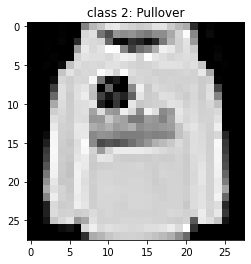

In [6]:
import matplotlib.pyplot as plt
data_train_feature_pre = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
print(data_train_feature_pre[0])
plt.imshow(data_train_feature_pre[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]) + ": Pullover" )
plt.show()

# 4. Task description

Your task is to determine / build a classifier for the given data set to classify images into categories and write a report. The score allocation is as follows:

    1. Code: max 65 points
    2. Report: max 35 points
    

## 4.1 Code
### The code must clearly show :
    1. Pre-process data
    2. Details of your implementation for each algorithm
    3. Fine-tune hyper-parameters for each algorithm and running time
    4. The comparison result between 4 different algorithms including 3 single methods and one ensemble method
    5. Hardware and software specifications of the computer that you used for performance evaluation

### 4.1.1 Data pre-processing

In [9]:
## Normalize the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(
    data_train_feature, data_train_label , random_state=42
)

s = MinMaxScaler()
s.fit(X_train)
Norm_data_train = s.transform(X_train)
Norm_data_test = s.transform(X_test)

186


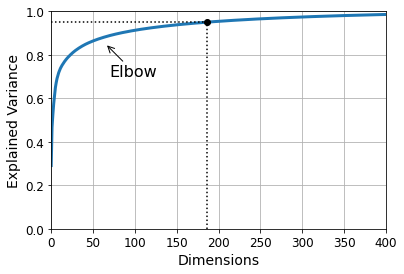

In [8]:
## Using PCA to check the minimum numnber of features that should be used.  
from sklearn.decomposition import PCA
import numpy as np 
pca = PCA()
pca.fit(Norm_data_train)
axissum = np.cumsum(pca.explained_variance_ratio_)

dimensions = np.argmax(axissum >= 0.95) + 1
print(dimensions) # 186 features are needed to preserve 95% of the variance

# #Visualize the dimension to check the best number of dimensions to use 
# Plot explained variance vs number of dimensions
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.figure(figsize=(6,4))
plt.plot(axissum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([dimensions, dimensions], [0, 0.95], "k:")
plt.plot([0, dimensions], [0.95, 0.95], "k:")
plt.plot(dimensions, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()






In [9]:
# Fit PCA model to normalize dataset 
pca_model = PCA(n_components=186)
X_train_reduce = pca_model.fit_transform(Norm_data_train)
X_test_reduce = pca_model.transform(Norm_data_test)
print(X_train_reduce.shape)
print(X_test_reduce.shape)

(22500, 186)
(7500, 186)


### 4.1.2 Classification algorithms 


Apply four classifier to the pre-processed dataset:

    1. Nearest Neighbor
    2. Logistic Regression
    3. Decision Tree
    4. SVM

and one ensemble method:
    
    1. Random forest
    
For binary classifiers, we can use those classifiers for the data which has more than 2 labels using the one-vs-rest method. The implementation can use sklearn, or can be implemented from scratch.

In [11]:
# Import the accuracy score module 
from sklearn.metrics import accuracy_score

In [11]:
#Neareast Neighbor
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier()
nn.fit(X_train_reduce, y_train)
output_prediction = nn.predict(X_test_reduce)
print("KNN Classifier accuracy on the test set: {:.2f}".format(accuracy_score(y_test, output_prediction)))

KNN Classifier accuracy on the test set: 0.85


In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

## One versus rest with multiclass set to 'ovr'
log_regression = LogisticRegression(multi_class='ovr')
log_regression.fit(X_train_reduce, y_train)
l_predict = log_regression.predict(X_test_reduce)
print("Logistic Regression Classifier accuracy on the test set: {:.2f}".format(accuracy_score(y_test, l_predict)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression Classifier accuracy on the test set: 0.85


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [13]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier()
tr.fit(X_train_reduce, y_train)
t_predict = tr.predict(X_test_reduce)
print("Decsion tree classifier accuracy on the test set: {:.2f}".format(accuracy_score(y_test, t_predict)))

Decsion tree classifier accuracy on the test set: 0.74


In [30]:
#SVC
from sklearn.svm import SVC


SVC = SVC(decision_function_shape='ovr')
SVC.fit(X_train_reduce, y_train)
svc_predict = SVC.predict(X_test_reduce)
print("Linear SVM - accuracy on test set: {:.3f}".format(accuracy_score(y_test, svc_predict)))

Linear SVM - accuracy on test set: 0.882


#### Ensemble Method

In [15]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_tree = RandomForestClassifier()
rf_tree.fit(X_train_reduce, y_train)
rf_predict = rf_tree.predict(X_test_reduce)
print("Random Forest ensembles of decsion tree:{:.2f}".format(accuracy_score(y_test, rf_predict)))


Random Forest ensembles of decsion tree:0.85


### 4.1.3 Parameter Tuning

For each classifiers we would like to find the best parameters using grid search with k-fold (k>=5) cross validation.

In [44]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Tuning for KNeighbor Classifier
KNN_para = {'n_neighbors': [1,3,5,11,15], 'p':[1,2]}



grid_search_knn = GridSearchCV(nn, KNN_para, cv=5)
grid_search_knn.fit(Norm_data_train, y_train)

print("KNN Test set score: {:.2f}".format(grid_search_knn.score(Norm_data_test, y_test)))
print("KNN Best parameters: {}".format(grid_search_knn.best_params_))
print("KNN Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))
print("KNN Best estimator:\n{}".format(grid_search_knn.best_estimator_))

KNN Test set score: 0.85
KNN Best parameters: {'n_neighbors': 5, 'p': 1}
KNN Best cross-validation score: 0.85
KNN Best estimator:
KNeighborsClassifier(p=1)


In [ ]:
# Tuning for Logistic Regression classifier
lr_para = {
           'max_iter':[2000, 3000, 6000]}
grid_search_lr = GridSearchCV(log_regression, lr_para, cv=5, return_train_score=10)
grid_search_lr.fit(Norm_data_train, y_train)
print("Logistic regression test set score: {:.2f}".format(grid_search_lr.score(Norm_data_test, y_test)))
print("Logistic regression best parameters: {}".format(grid_search_lr.best_params_))
print("Logistic regression best cross-validation score: {:.2f}".format(grid_search_lr.best_score_))
print("Logistic regression best estimator:\n{}".format(grid_search_lr.best_estimator_))


Logistic regression test set score: 0.84
Logistic regression best parameters: {'max_iter': 2000}
Logistic regression best cross-validation score: 0.84
Logistic regression best estimator:
LogisticRegression(max_iter=2000)


In [ ]:
# Tuning for Decision Tree
tree_para = {"min_samples_split": [10,20,30,40]}
grid_search_dt = GridSearchCV(tr, tree_para, cv=5, return_train_score=True)
grid_search_dt.fit(Norm_data_train, y_train)
print("Decision Tree test set score: {:.2f}".format(grid_search_dt.score(Norm_data_test, y_test)))
print("Decision Tree best parameters: {}".format(grid_search_dt.best_params_))
print("Decision Tree best cross-validation score: {:.2f}".format(grid_search_dt.best_score_))
print("Decision Tree best estimator:\n{}".format(grid_search_dt.best_estimator_))



Decision Tree test set score: 0.78
Decision Tree best parameters: {'min_samples_split': 30}
Decision Tree best cross-validation score: 0.78
Decision Tree best estimator:
DecisionTreeClassifier(criterion='entropy', min_samples_split=30,
                       random_state=42, splitter='random')


In [ ]:
# Tuning for Ensemble method of RandomForest classifier 
from sklearn.ensemble import RandomForestClassifier
forest_para = {"n_estimators":[50, 100, 150, 200,400], "max_depth":[30,50,70], "criterion":["gini","entropy"], "min_samples_split":[1,2,3,4,5,10,20,30,40],
               "n_jobs": [-1]}

grid_search_randf = GridSearchCV(RandomForestClassifier(), forest_para, cv=5, return_train_score=True)
grid_search_randf.fit(X_train_reduce, y_train)

print("Random Forest test set score: {:.2f}".format(grid_search_randf.score(X_test_reduce, y_test)))
print("Random Forest best parameters: {}".format(grid_search_randf.best_params_))
print("Random Forest best cross-validation score: {:.2f}".format(grid_search_randf.best_score_))
print("Random Forest best estimator:\n{}".format(grid_search_randf.best_estimator_))

In [ ]:
# Tuning for SVM 
# Runnable but time intensive. 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearcCV on the training set
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=10,
                          return_train_score=True)

grid_search.fit(X_train_reduce, y_train)

# Accuracy on test set of the model with selected best parameters:
print("Test set score: {:.2f}".format(grid_search.score(X_test_reduce, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))


### 4.1.4 Classifier comparisons

After finding the best parameter for each algorithm, we would like to make comparisons between all classifiers using their own best hyper-parameters.

In [12]:
# Optimized Classifier of KNN with the best hyper_parameters
from sklearn.neighbors import KNeighborsClassifier
opt_nn = KNeighborsClassifier(n_neighbors=5, p=1, n_jobs=-1)
opt_nn.fit(Norm_data_train, y_train)
opt_output_prediction = opt_nn.predict(Norm_data_test)
print("KNN Classifier accuracy on the test set: {:.2f}".format(accuracy_score(y_test, opt_output_prediction)))

KNN Classifier accuracy on the test set: 0.85


In [15]:
# Optimized Classifier of logistic regression with best hyperparameter 
from sklearn.linear_model import LogisticRegression
opt_log = LogisticRegression(max_iter=2000)
opt_log.fit(Norm_data_train, y_train)
opt_log_predict = opt_log.predict(Norm_data_test)
print("Logistic Regression Classifier accuracy on the test set: {:.2f}".format(accuracy_score(y_test, opt_log_predict)))


Logistic Regression Classifier accuracy on the test set: 0.84


In [26]:
# Optimized Classifier of Decision Tree with the best hyper_parameter 
from sklearn.tree import DecisionTreeClassifier
opt_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=30,
                       random_state=42, splitter='random')
opt_tree.fit(Norm_data_train, y_train)
opt_tree_predict = opt_tree.predict(Norm_data_test)
print("Decision Tree Classifier accuracy on the test set: {:.2f}".format(accuracy_score(y_test, opt_tree_predict)))


Decision Tree Classifier accuracy on the test set: 0.78


In [12]:
# Optimized Classifier of random forest with the best hyper_parameter 
from sklearn.ensemble import RandomForestClassifier

opt_rand_forest = RandomForestClassifier(max_depth=70,
 max_features='auto',
 min_samples_leaf=4,
 min_samples_split=10,
 n_estimators=400)
opt_rand_forest.fit(Norm_data_train, y_train)
opt_rand_forest_predict = opt_rand_forest.predict(Norm_data_test)
print("Random forest classifier accuracy on the test set: {:.2f}".format(accuracy_score(y_test, opt_rand_forest_predict)))



Random forest classifier accuracy on the test set: 0.87


In [42]:
# Optimized parameter with SVC
# Since the tuning is time intensive, we only set decision function shape to be 
# 'ovr' for binary classifier
from sklearn.svm import SVC

opt_svc = SVC(decision_function_shape='ovr')
opt_svc.fit(Norm_data_train, y_train)
svc_predict = opt_svc.predict(Norm_data_test)
print("SVM - accuracy on test set: {:.3f}".format(accuracy_score(y_test, svc_predict)))

SVM - accuracy on test set: 0.878


# 5.Output Prediction

Load test data and output the prediction. 

In [4]:
# test_input.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test_df = pd.read_csv('./Input/test/test_input.csv', index_col=0)

In [5]:
data_test_df.head()

,v1,v2,v3,v4,v5,...,v780,v781,v782,v783,v784
id,,,,,,,,,,,
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0


After making a prediction on test data, all predicted lables will be saved in “test_output.csv”. 

Here are the output predictions using the test input file. The output csv files are uploaded to kaggle for a score evaluation. 

In [6]:
# Use the highest parameter tuning score in the models to predict the label, test file as input. 
# Extract the features from test file 
data_test_feature = data_test_df.loc[:, "v1": "v784"].to_numpy()

Output CSV file for Support Vector Machine.

In [39]:
ouput_svc = opt_svc.predict(data_test_feature)
output_svc_df = pd.DataFrame(ouput_svc, columns = ['label'])
output_svc_df.to_csv('./Output/svc_test_output.csv', sep=",", float_format='%d', index_label="id")

Output CSV file for Random Forest Classifier.

In [14]:
output_rand_forest = opt_rand_forest.predict(data_test_feature)
output_df_rand = pd.DataFrame(output_rand_forest, columns = ['label'])
output_df_rand.to_csv('./Output/test_output.csv', sep=",", float_format='%d', index_label="id")

Output CSV file for Logistic Regression Classifier.

In [ ]:
output_Logistic = opt_log.predict(data_test_feature)
output_Logistic_df = pd.DataFrame(output_Logistic, columns = ['label'])
output_Logistic_df.to_csv('./Output/test_output_log.csv', sep=",", float_format='%d', index_label="id")

Output CSV file for KNN Neighbor Classifier.

In [ ]:
output_knn = opt_nn.predict(data_test_feature)
output_knn_df= pd.DataFrame(output_knn, columns = ['label'])
output_knn_df.to_csv('./Output/knn_test_output.csv', sep=",", float_format='%d', index_label="id")

Output CSV file for Decision Tree classifier.

In [ ]:
output_decision_tree = opt_tree.predict(data_test_feature)
output_decision_tree_df = pd.DataFrame(output_decision_tree, columns = ['label'])
output_decision_tree_df.to_csv('./Output/de_tree_test_output.csv', sep=",", float_format='%d', index_label="id")

### Output Prediction on Kaggle

Accuracy: 
1. Random Forest Classifier: 77%
2. Logistic Regression: 76.3%
3. KNN: 69.8%
4. Decision Tree: 57.8%
5. Support Vector Machine: 9%

Conclusion: Random forest classifier is our best model to predict the given test data set. 